In [1]:
import sys
import numpy as np
import matplotlib.pyplot as plt
from dynesty import plotting as dyplot
from dynesty import utils as dyfunc

try:
    import snelib19odp
except ImportError:
    sys.path.append('../lib')
import snelib19odp.dataloader as dataloader
import snelib19odp.analysis.oxygen as oxygen

In [2]:
spec = dataloader.load_obs_spec('ZTF19abqwtfu_20200821_Keck1_v1.ascii', fluxcal=False)
spec

<Table length=5132>
   col1       col2         col3    ... fluxerr mask      restwave     
 float64    float64      float64   ... float64 bool      float64      
--------- ------------ ----------- ... ------- ---- ------------------
3055.5166 -2.51726e-17 1.59557e-16 ...     nan True 3012.2813261261117
3057.4631  6.28556e-18 1.40631e-16 ...     nan True 3014.2002833333167
3059.4104  1.00302e-17 1.48725e-16 ...     nan True 3016.1200292205967
3061.3582 -1.59771e-18 1.56783e-16 ...     nan True 3018.0402680329234
3063.3064  1.91786e-17 1.57387e-16 ...     nan True  3019.960901185287
3065.2554  -5.9848e-18 1.63794e-16 ...     nan True 3021.8823230177263
3067.2048  2.48519e-18 1.39915e-16 ...     nan True  3023.804139190203
 3069.155 -1.21535e-17 1.35701e-16 ...     nan True 3025.7267440427545
3071.1057 -1.03304e-17 1.35954e-16 ...     nan True 3027.6498418203523
3073.0569  2.48908e-17 1.09118e-16 ...     nan True 3029.5734325229973
      ...          ...         ... ...     ...  ...                ...
10293.091 -6.05665e-18 3.05589e-16 ...     nan True 10147.444725849877
10294.274  4.67831e-18 3.43863e-16 ...     nan True 10148.610986510612
10295.458  6.19519e-18 3.45899e-16 ...     nan True 10149.778233021443
10296.641 -3.26471e-18 3.25493e-16 ...     nan True 10150.944493682178
10297.824 -4.06938e-18  2.9428e-16 ...     nan True 10152.110754342915
10299.007 -9.96087e-18 2.20686e-16 ...     nan True 10153.277015003652
10300.191  5.60149e-18 1.49767e-16 ...     nan True 10154.444261514484
10301.374 -1.84071e-18 1.33735e-16 ...     nan True 10155.610522175219
10302.557   2.7053e-18  1.4636e-16 ...     nan True 10156.776782835956
 10303.74 -8.23702e-19  1.6083e-16 ...     nan True  10157.94304349669

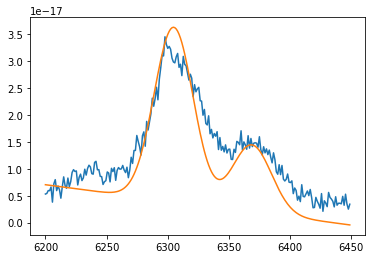

In [3]:
idx = np.logical_and(spec['restwave'] > 6200, spec['restwave'] < 6450)
plt.plot(spec['restwave'][idx], spec['flux'][idx])
continuum_level_6300_6364 = 0.3e-17
continuum_slope_6300_6364 = 0.03/1e18
amplitude_6300 = 1.3e-15
amplitude_6364 = 0.5e-15
line_width = 16
#modflux = oxygen.generation_func_5577(spec['restwave'][idx], continuum_level_5577, continuum_slope_5577, amplitude_5577, line_width)
modflux = oxygen.generation_func_6300_6364(spec['restwave'][idx]-5, continuum_level_6300_6364, continuum_slope_6300_6364, amplitude_6300, amplitude_6364, line_width)
plt.plot(spec['restwave'][idx], modflux)

In [6]:
cfg = oxygen.FitSetup(spec=spec, smp=1, start5577=5520, stop5577=5700, start6300_6364=6230, stop6300_6364=6450)
results, samples = oxygen.run_dynesty_fit(cfg)

22731it [02:16, 166.91it/s, bound: 4 | nc: 3 | ncall: 161481 | eff(%): 14.077 | loglstar:   -inf < -5.975 <    inf | logz: -13.431 +/-    nan | dlogz:  7.183 >  4.009]           


KeyboardInterrupt: 

In [5]:
oxygen.prior(np.zeros(8), 1.9797431366150075e+26, 1.983371407166366e+26)

array([-1.80000000e+01,  1.00000000e+03,  1.00000000e+01,  1.00000000e-01,
       -2.00000000e-02,  1.00000000e-01, -2.00000000e-02,  1.97974314e+26])

In [5]:
#prior = oxygen.prior(np.array([0, , 1.9797431366150075e+26, 1.983371407166366e+26)
prior = np.array([-15, 7000, 16, 0.1, 0, 0.1, 0, 1.9797431366150075e+26, -5])
spec_wave = spec['restwave']
spec_flux = spec['flux']
grp_5577 = np.logical_and(spec_wave > cfg.start5577, spec_wave < cfg.stop5577)
grp_6300_6364 = np.logical_and(spec_wave > cfg.start6300_6364, spec_wave < cfg.stop6300_6364)

oxygen.likelihood(prior, spec_wave, spec_flux, grp_5577, grp_6300_6364)

-2.7821969237184483